In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn import svm 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

C:\Users\JYOTIKA\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
data = pd.read_csv(r'C:\Users\JYOTIKA\Desktop\thesis\heart1.csv')


In [3]:
features= np.array(data.iloc[:,:12])
features

array([[63. ,  1. ,  1. , ...,  2.3,  3. ,  0. ],
       [67. ,  1. ,  4. , ...,  1.5,  2. ,  3. ],
       [67. ,  1. ,  4. , ...,  2.6,  2. ,  2. ],
       ...,
       [65. ,  1. ,  4. , ...,  2.8,  2. ,  1. ],
       [48. ,  1. ,  4. , ...,  0. ,  1. ,  2. ],
       [63. ,  0. ,  4. , ...,  4. ,  2. ,  3. ]])

In [4]:
labels= data.iloc[:,-1:].values
labels

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.5, random_state=0)
#0

In [6]:
ml = svm.SVC(kernel='linear') 

ml.fit(x_train, y_train)

y_pred = ml.predict(features)

C:\Users\JYOTIKA\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(features,y_pred,test_size=0.30)

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model.fit(X1_train, y1_train)
Y1_pred = model.predict(features)


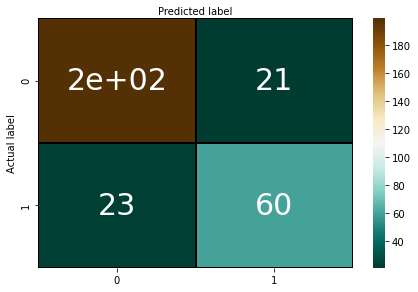

array([[199,  21],
       [ 23,  60]], dtype=int64)

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(labels,Y1_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True,cmap='BrBG_r',linewidths=1, linecolor='black',annot_kws={"size": 30})
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()
confusion_matrix

In [10]:
TP=confusion_matrix[0][0]
TN=confusion_matrix[1][1]
FN=confusion_matrix[1][0]
FP=confusion_matrix[0][1]
print('Accuracy for the hybrid model:',(TP+TN)/(TP+TN+FN+FP))
print('Sensitivity for the hybrid model:',(TP/(TP+FN)))
print('Specificity for the hybrid model:',(TN/(TN+FP)))
print('Precision for the hybrid model:',(TP/(TP+FP)))

Accuracy for the hybrid model: 0.8547854785478548
Sensitivity for the hybrid model: 0.8963963963963963
Specificity for the hybrid model: 0.7407407407407407
Precision for the hybrid model: 0.9045454545454545
